In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [111]:
data = pd.read_csv('../data/clean/cleaned_data.csv')

In [112]:
profile = ProfileReport(data, title="Profiling Report")

In [113]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 214.10it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='log_price'>

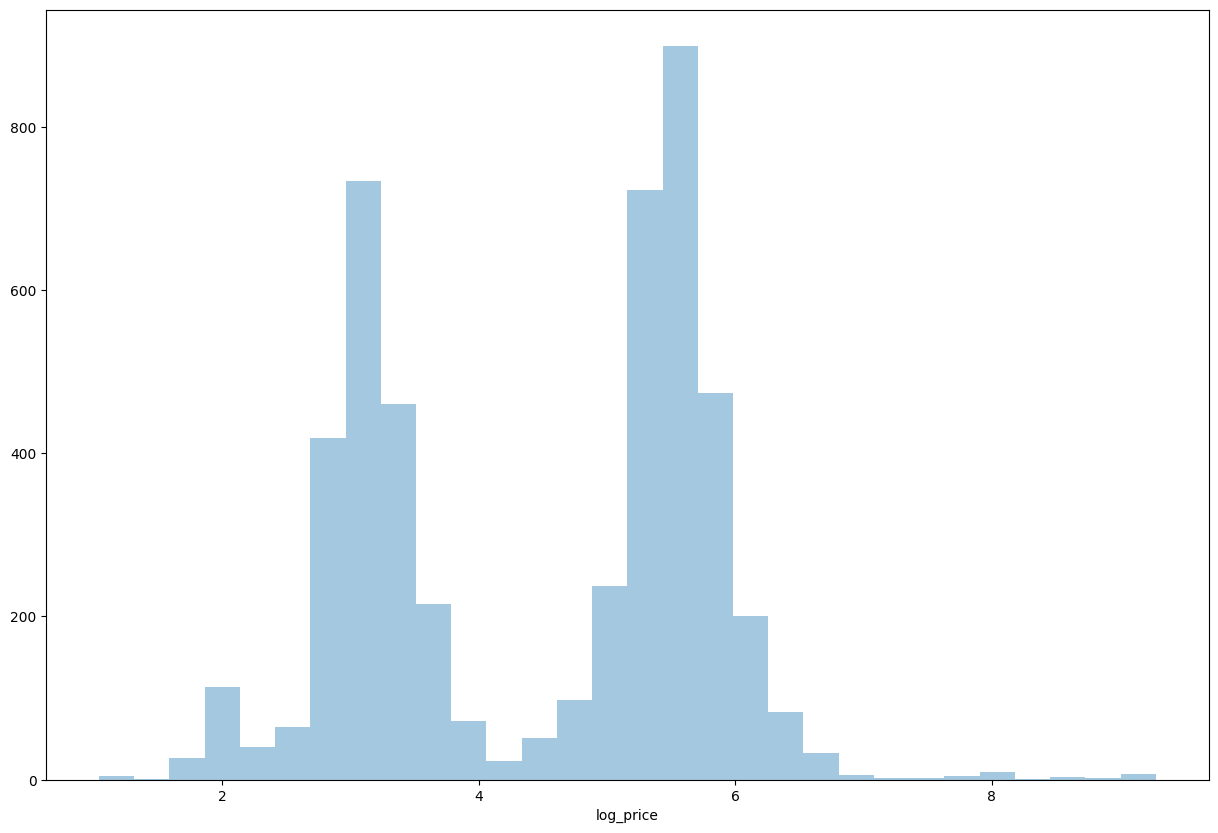

In [114]:
plt.figure(figsize=(15,10))
sns.distplot(data.log_price,kde=False)

<Axes: xlabel='type', ylabel='log_price'>

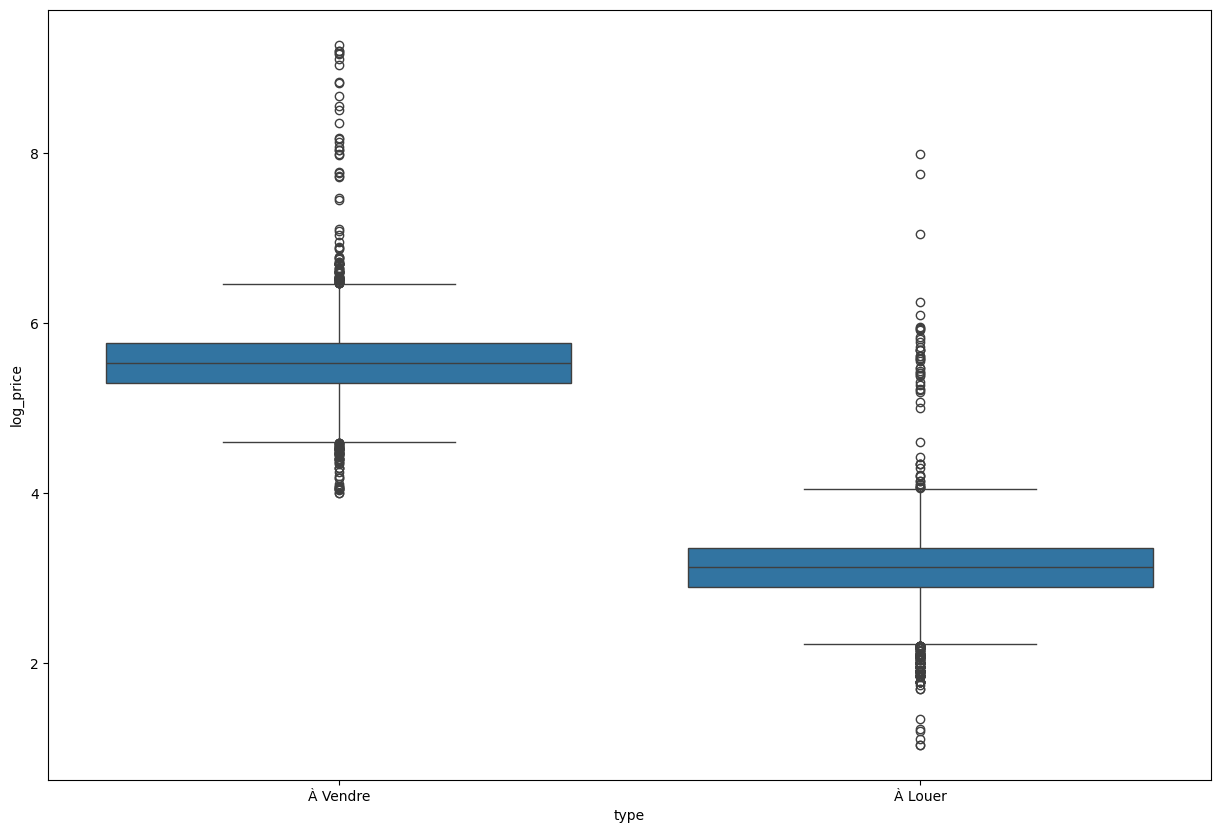

In [115]:
plt.figure(figsize=(15,10))
sns.boxplot(x='type',y='log_price', data=data)

<Axes: xlabel='count', ylabel='location'>

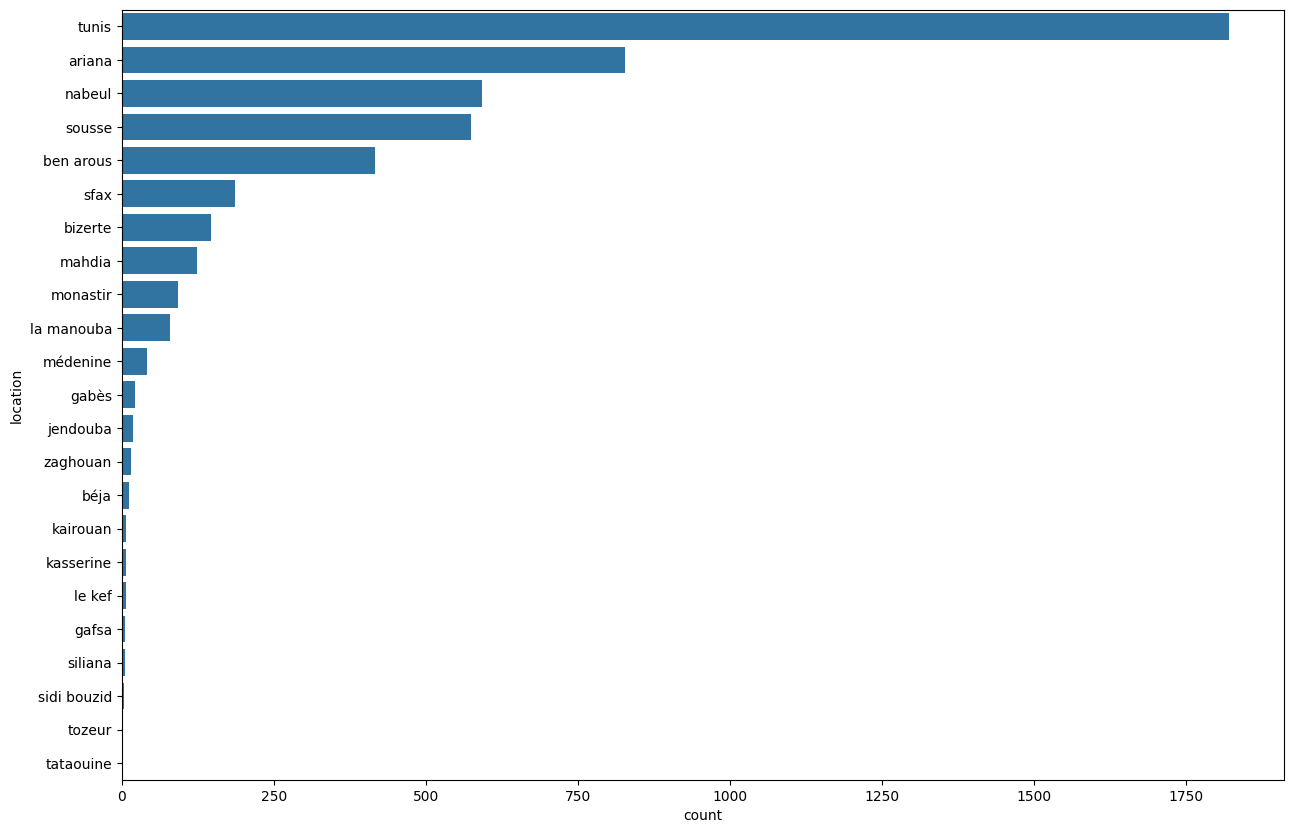

In [116]:
plt.figure(figsize=(15,10))
sns.countplot(y='location', data=data, order=data.location.value_counts().index)

<Axes: xlabel='count', ylabel='category'>

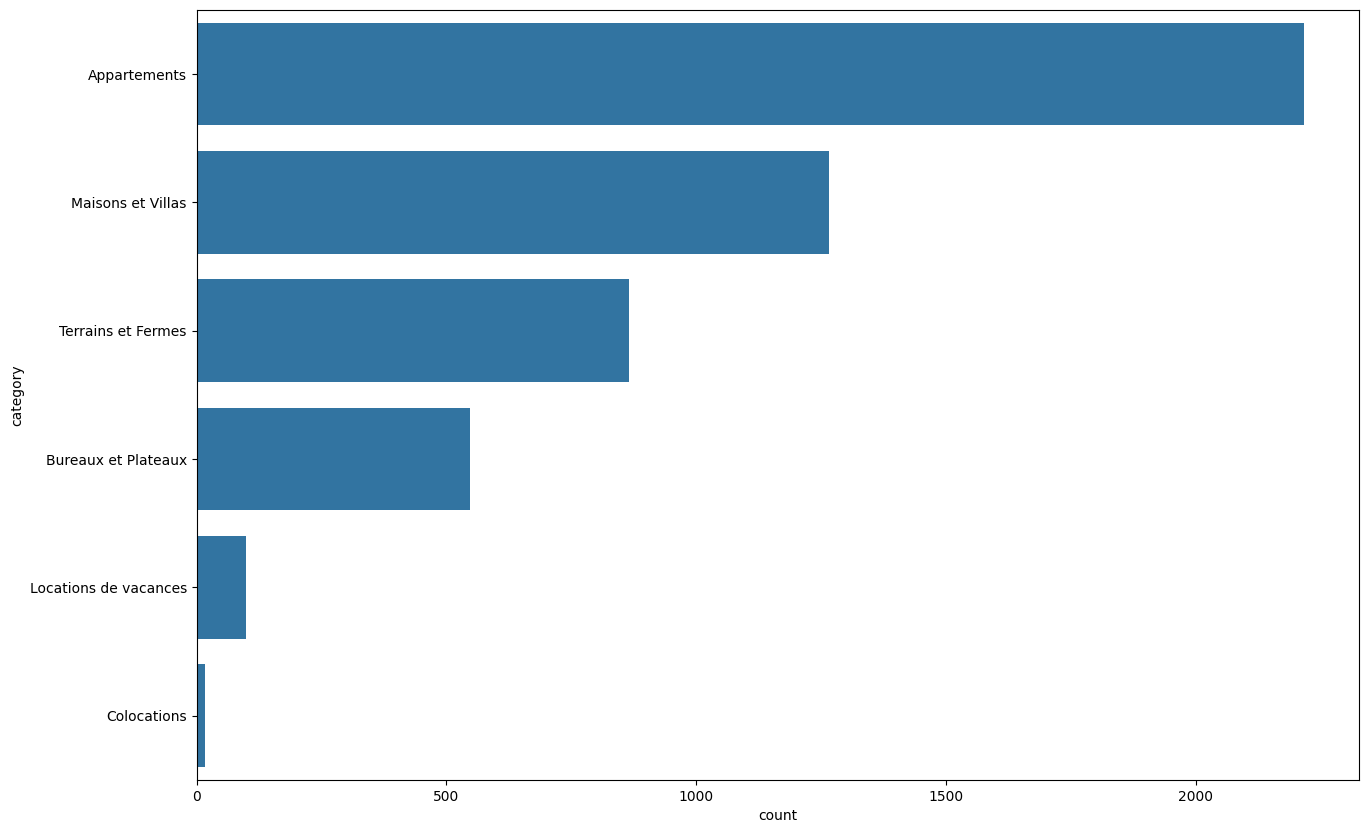

In [117]:
plt.figure(figsize=(15,10))
sns.countplot(y='category', data=data, order=data.category.value_counts().index)

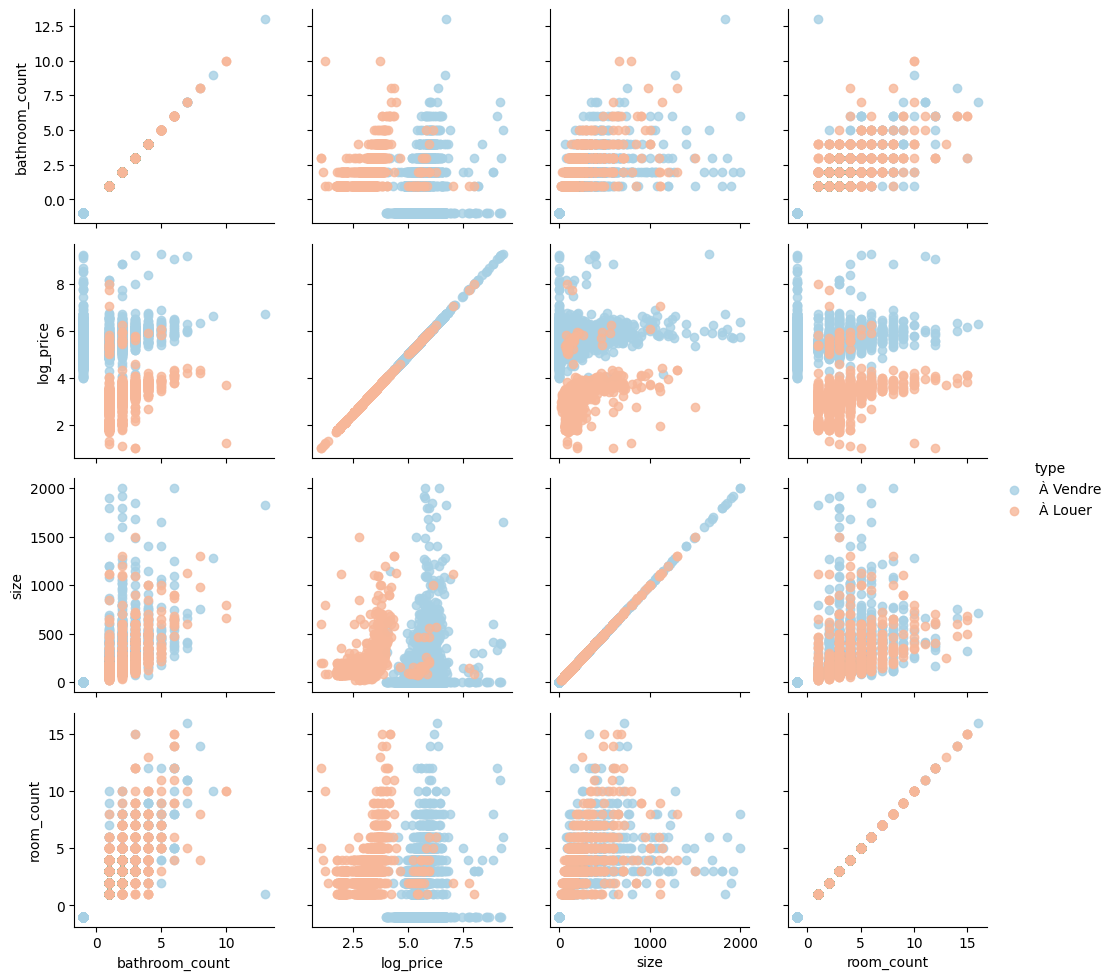

In [118]:
g = sns.PairGrid(data, vars=['bathroom_count', 'log_price', 'size', 'room_count'],
                 hue='type', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

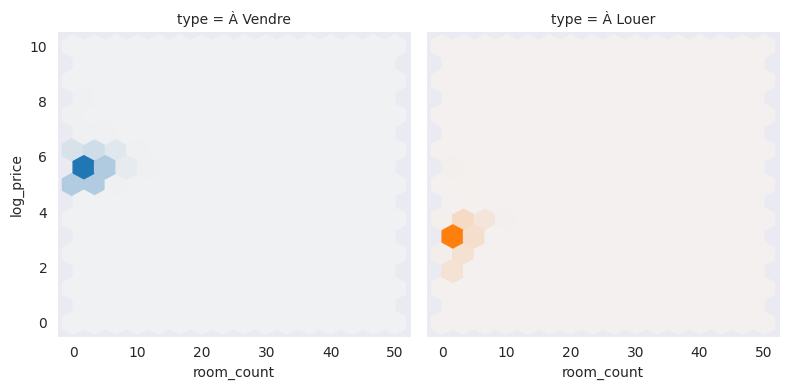

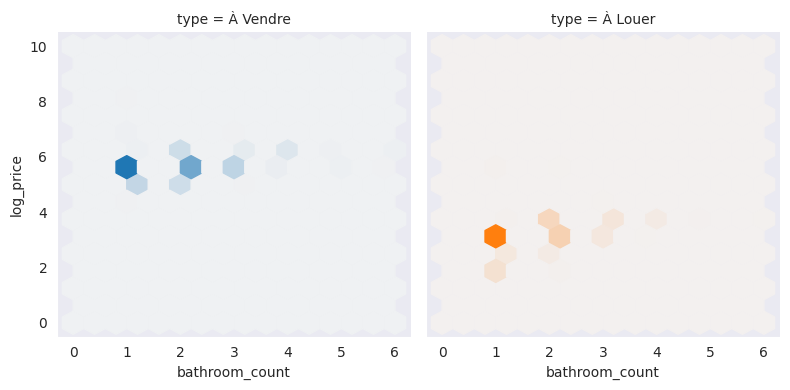

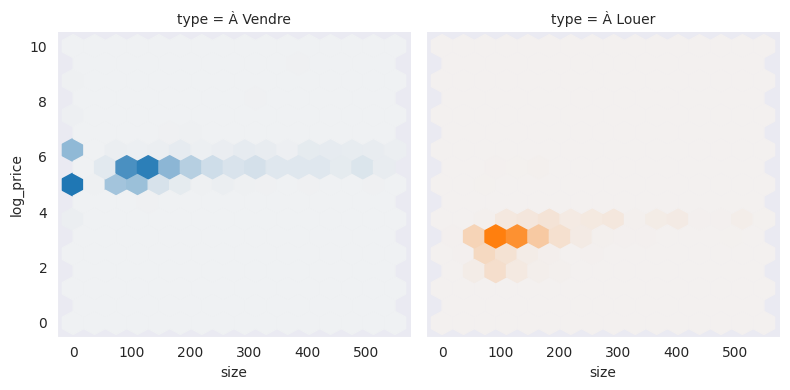

In [119]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g1 = sns.FacetGrid(data, hue="type", col="type", height=4)
    g2 = sns.FacetGrid(data, hue="type", col="type", height=4)
    g3 = sns.FacetGrid(data, hue="type", col="type", height=4)

g1.map(hexbin, "room_count", "log_price", extent=[0, 50, 0, 10]);
g2.map(hexbin, "bathroom_count", "log_price", extent=[0, 6, 0, 10]);
g3.map(hexbin, "size", "log_price", extent=[0, 550, 0, 10]);

In [120]:
data

,price,type,size,bathroom_count,room_count,location,category,log_price
0,180000.0,À Vendre,121.0,1.0,3.0,ariana,Appartements,5.255273
1,430000.0,À Vendre,145.0,2.0,4.0,ariana,Appartements,5.633468
2,450000.0,À Vendre,-1.0,-1.0,-1.0,mahdia,Terrains et Fermes,5.653213
3,690000.0,À Vendre,-1.0,-1.0,-1.0,sousse,Terrains et Fermes,5.838849
4,790000.0,À Vendre,-1.0,-1.0,-1.0,sousse,Terrains et Fermes,5.897627
...,...,...,...,...,...,...,...,...
5004,750.0,À Louer,70.0,1.0,1.0,ariana,Appartements,2.875061
5005,260000.0,À Vendre,90.0,2.0,4.0,tunis,Appartements,5.414973
5006,230000.0,À Vendre,120.0,1.0,4.0,ariana,Bureaux et Plateaux,5.361728
5007,460000.0,À Vendre,164.0,2.0,3.0,ben arous,Appartements,5.662758


In [121]:
data2 = pd.DataFrame()
data2['location'] = data.location.unique()
data2 = data2.sort_values('location')
data2["lat"] = 0.0
data2["long"] = 0.0

# Dictionary for coordinates
coords = {
    'tunis': (36.806112, 10.171078),
    'ariana': (36.860117, 10.193371),
    'ben arous': (36.753056, 10.218889),
    'la manouba': (36.808029, 10.097205),
    'nabeul': (36.456058, 10.73763),
    'zaghouan': (36.402907, 10.142925),
    'bizerte': (37.274423, 9.87391),
    'béja': (36.725638, 9.181692),
    'jendouba': (36.501136, 8.780239),
    'le kef': (36.174239, 8.704863),
    'siliana': (36.084966, 9.370818),
    'sousse': (35.825388, 10.636991),
    'monastir': (35.783333, 10.833333),
    'mahdia': (35.504722, 11.062222),
    'sfax': (34.740556, 10.760278),
    'kairouan': (35.678102, 10.096333),
    'kasserine': (35.167578, 8.836506),
    'sidi bouzid': (35.038234, 9.484935),
    'gabès': (33.881457, 10.098196),
    'médenine': (33.354947, 10.505478),
    'tataouine': (32.929674, 10.451767),
    'gafsa': (34.425, 8.784167),
    'tozeur': (33.919683, 8.13352)
}

# Assign coordinates
# Map coordinates correctly
data2[['lat', 'long']] = data2['location'].apply(lambda x: pd.Series(coords.get(x.lower(), (33.704387, 8.969034))))

In [122]:
data2.reset_index(drop=True, inplace=True)

data2['sum_room_count'] = data.groupby(['location'])['room_count'].sum().reset_index(name='sum_room_count')['sum_room_count']
data2['sum_bathroom_count'] = data.groupby(['location'])['bathroom_count'].sum().reset_index(name='sum_bathroom_count')['sum_bathroom_count']
data2['sum_size'] = data.groupby(['location'])['size'].sum().reset_index(name='sum_size')['sum_size']
data2['sum_log_price'] = data.groupby(['location'])['log_price'].sum().reset_index(name='sum_log_price')['sum_log_price']

In [123]:
# Count 'À Vendre' by location
data2['sum_À Vendre'] = data[data["type"]=='À Vendre'].groupby(['location'])['type'].count().reset_index(name='sum_À Vendre')['sum_À Vendre']

# Count 'À Louer' by location
x = data[data["type"]=='À Louer'].groupby(['location'])['type'].count().reset_index(name='sum_À Louer')

# Get all unique locations
all_locations = pd.DataFrame({'location': data.location.unique()})

# Merge to include all locations (missing ones will have NaN, then fill with 0)
x = all_locations.merge(x, on='location', how='left').fillna(0)

x = x.sort_values('location').reset_index(drop=True)
data2['sum_À Louer'] = x['sum_À Louer']

In [124]:
# Get all unique locations once
all_locations = pd.DataFrame({'location': data.location.unique()})

for c in ['Appartements', 'Bureaux et Plateaux', 'Colocations', 'Locations de vacances', 
          'Magasins, Commerces et Locaux industriels', 'Maisons et Villas', 'Terrains et Fermes']:
    # Count occurrences for this category
    x = data[data["category"]==c].groupby(['location'])['category'].count().reset_index(name='sum_'+c)
    
    # Merge with all locations to ensure no missing locations
    x = all_locations.merge(x, on='location', how='left').fillna(0)
    
    # Sort and reset index
    x = x.sort_values('location').reset_index(drop=True)
    
    # Add to data2
    data2['sum_'+c] = x['sum_'+c]

In [125]:
data2 = data2.fillna(0)

In [126]:
num = data2._get_numeric_data()
num[num < 0] = 0

In [127]:
data2

,location,lat,long,sum_room_count,sum_bathroom_count,sum_size,sum_log_price,sum_À Vendre,sum_À Louer,sum_Appartements,sum_Bureaux et Plateaux,sum_Colocations,sum_Locations de vacances,"sum_Magasins, Commerces et Locaux industriels",sum_Maisons et Villas,sum_Terrains et Fermes
0,ariana,36.860117,10.193371,2043.0,1171.0,135002.0,3690.083394,435,392.0,441.0,71.0,3.0,9.0,0.0,198.0,105
1,ben arous,36.753056,10.218889,962.0,442.0,62552.0,1899.369710,259,158.0,167.0,36.0,2.0,2.0,0.0,131.0,79
2,bizerte,37.274423,9.873910,219.0,75.0,21173.0,719.180192,120,26.0,34.0,3.0,0.0,3.0,0.0,47.0,59
3,béja,36.725638,9.181692,0.0,0.0,1030.0,64.564338,12,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10
4,gabès,33.881457,10.098196,50.0,14.0,3173.0,99.128116,17,4.0,3.0,1.0,0.0,2.0,0.0,6.0,9
5,gafsa,34.425000,8.784167,2.0,0.0,316.0,32.372676,6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4
6,jendouba,36.501136,8.780239,23.0,5.0,1915.0,83.019261,14,5.0,2.0,0.0,0.0,3.0,0.0,6.0,8
7,kairouan,35.678102,10.096333,0.0,0.0,164.0,38.353064,6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6
8,kasserine,35.167578,8.836506,4.0,0.0,2265.0,35.764516,7,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5
9,la manouba,36.808029,10.097205,80.0,9.0,6311.0,399.342767,63,17.0,14.0,1.0,0.0,0.0,0.0,20.0,45


In [128]:
m = folium.Map(location=[33.8869, 10], tiles='cartodbpositron', zoom_start=6)

for i in range(0, len(data2)):
    
    folium.Circle(
        location=[data2.iloc[i]['lat'], data2.iloc[i]['long']],
        color='crimson',
        fill=True,
        tooltip =   '<li><bold>City : '+str(data2.iloc[i]['location'])+
                    '<li><bold>sum(log(Prices)) : '+str(data2.iloc[i]['sum_log_price'])+
                    '<li><bold>sum(For sale) : '+str(data2.iloc[i]['sum_À Vendre'])+
                    '<li><bold>sum(For rent) : '+str(data2.iloc[i]['sum_À Louer'])+
                    '<li><bold>sum(Apartments) : '+str(data2.iloc[i]['sum_Appartements'])+
                    '<li><bold>sum(Offices) : '+str(data2.iloc[i]['sum_Bureaux et Plateaux'])+
                    '<li><bold>sum(Shared flat) : '+str(data2.iloc[i]['sum_Colocations'])+
                    '<li><bold>sum(Holiday rents) : '+str(data2.iloc[i]['sum_Locations de vacances'])+
                    '<li><bold>sum(Shops, Stores and Industrial) : '+str(data2.iloc[i]['sum_Magasins, Commerces et Locaux industriels'])+
                    '<li><bold>sum(Houses and Villas) : '+str(data2.iloc[i]['sum_Maisons et Villas'])+
                    '<li><bold>sum(Land and Farms) : '+str(data2.iloc[i]['sum_Terrains et Fermes'])+
                    '<li><bold>sum(Rooms) : '+str(data2.iloc[i]['sum_room_count'])+
                    '<li><bold>sum(Bathrooms) : '+str(data2.iloc[i]['sum_bathroom_count'])+
                    '<li><bold>sum(Size) : '+str(data2.iloc[i]['sum_size']),
        
        radius=int(data2.iloc[i]['sum_log_price'])**1).add_to(m)
    
m